In [1]:
import neurokit2 as nk  # Load the package
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift


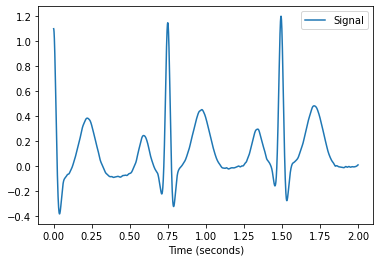

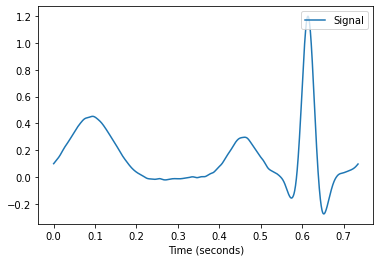

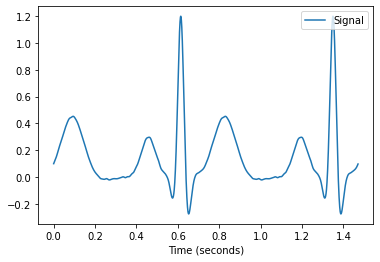

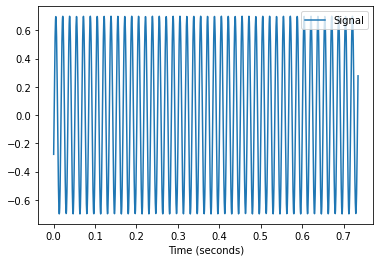

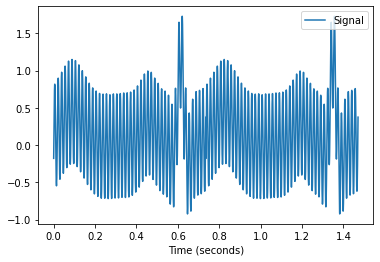

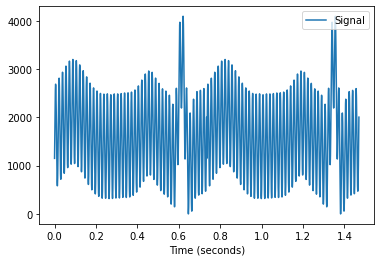

In [2]:
fs = 2000
ecg = nk.ecg_simulate(duration=2, sampling_rate=fs, heart_rate=80)

i = np.where((ecg < 0.1) & (ecg > 0.098))
#print(i)
#print(i[0][5])
data = ecg[i[0][4]:i[0][8]]

nk.signal_plot(ecg, sampling_rate=fs)  
nk.signal_plot(data, sampling_rate=fs)  
nk.signal_plot(np.concatenate([data, data]), sampling_rate=fs)  

# noise sin 60Hz
t = len(data)/ fs
n = t*60


x = np.linspace(-n*np.pi, n*np.pi, len(data))
noise = 0.7*np.sin(x)
data_noise = data + noise
nk.signal_plot(noise, sampling_rate=fs)
nk.signal_plot(np.concatenate([data_noise, data_noise]), sampling_rate=fs)

delta = data_noise.max() + abs(data_noise.min())
scale = 3.0 / delta
data_noise = (data_noise + abs(data_noise.min())) * scale
data_noise = data_noise * 4095/3.0

nk.signal_plot(np.concatenate([data_noise, data_noise]), sampling_rate=fs)


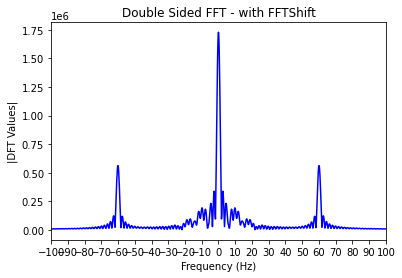

In [26]:
NFFT=10000
X=fftshift(fft(data_noise,NFFT))
fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT

fig4, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
ax.plot(fVals,np.abs(X),'b');
ax.set_title('Double Sided FFT - with FFTShift');
ax.set_xlabel('Frequency (Hz)');
ax.set_ylabel('|DFT Values|');
ax.set_xlim(-100,100);
ax.set_xticks(np.arange(-100, 100+10,10));

In [27]:
f = open("ecg.h","w")
f.write("#ifndef ECG_H\r\n#define ECG_H\r\n")
f.write("int ecg[] = { ")
c = 0
for n in data_noise:
    c = c+1
    f.write("{}, ".format(int(n)))
    if(c > 15):
        c = 0
        f.write("\r\n")
        
f.write("}")
f.write("\r\n#enfif")
f.close()
